In [ ]:
!pip install reverse_geocoder
!pip install geocoder
!pip install folium

In [ ]:
import pandas as pd
import zipfile
import reverse_geocoder as rg 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
import types
from botocore.client import Config
import folium
from geopy.geocoders import Nominatim

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test1.csv')

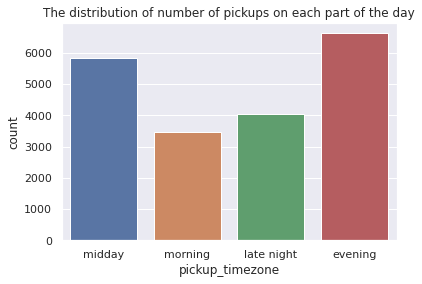

In [ ]:
sns.countplot(x='pickup_timezone',data=df_train)
plt.title('The distribution of number of pickups on each part of the day')
plt.show()

In [ ]:
morning = df_train[df_train['pickup_timezone']=='morning']
midday = df_train[df_train['pickup_timezone']=='midday']
evening = df_train[df_train['pickup_timezone']=='evening']
latenight = df_train[df_train['pickup_timezone']=='late night'] 

In [ ]:
morning_altered = morning[["index", "vendor_id","pickup_location","pickup_timezone","pickup_day"]]
midday_altered = midday[["index", "vendor_id","pickup_location","pickup_timezone","pickup_day"]]
evening_altered = evening[["index", "vendor_id","pickup_location","pickup_timezone","pickup_day"]]
latenight_altered = latenight[["index", "vendor_id","pickup_location","pickup_timezone","pickup_day"]]

In [ ]:
mrng = morning_altered.groupby(["pickup_location", "pickup_timezone"])
middy = midday_altered.groupby(["pickup_location", "pickup_timezone"])
evng = evening_altered.groupby(["pickup_location", "pickup_timezone"])
latengt = latenight_altered.groupby(["pickup_location", "pickup_timezone"])

In [ ]:
mrng_nos=[]
midday_nos=[]
evng_nos=[]
latenight_nos=[]
for key,item in mrng:
  a_group = mrng.get_group(key)
  mrng_nos.append([key[0],len(a_group)])

for key,item in middy:
  a_group = middy.get_group(key)
  midday_nos.append([key[0],len(a_group)])

for key,item in evng:
  a_group = evng.get_group(key)
  evng_nos.append([key[0],len(a_group)])

for key,item in latengt:
  a_group = latengt.get_group(key)
  latenight_nos.append([key[0],len(a_group)])


In [ ]:
mrng_nos


[['Bayonne', 1],
 ['Borough of Queens', 6],
 ['Brooklyn', 17],
 ['Coney Island', 1],
 ['East Atlantic Beach', 1],
 ['East New York', 2],
 ['Edgewater', 22],
 ['Fort Lee', 1],
 ['Guttenberg', 30],
 ['Hoboken', 19],
 ['Inwood', 56],
 ['Jamaica', 23],
 ['Long Island City', 583],
 ['Manhattan', 1343],
 ['New York City', 864],
 ['Newark', 1],
 ['The Bronx', 50],
 ['Weehawken', 453],
 ['White Plains', 1]]

In [ ]:
midday_nos


[['Bayonne', 1],
 ['Borough of Queens', 1],
 ['Brooklyn', 15],
 ['Edgewater', 31],
 ['Guttenberg', 39],
 ['Hasbrouck Heights', 1],
 ['Hoboken', 41],
 ['Inwood', 100],
 ['Jamaica', 23],
 ['Long Island City', 859],
 ['Manhattan', 2644],
 ['New York City', 1378],
 ['North Haledon', 1],
 ['The Bronx', 172],
 ['Weehawken', 544]]

In [ ]:
evng_nos


[['Bensonhurst', 2],
 ['Brooklyn', 17],
 ['East New York', 2],
 ['Edgewater', 44],
 ['Elmwood Park', 1],
 ['Fort Lee', 2],
 ['Guttenberg', 38],
 ['Hempstead', 1],
 ['Hoboken', 87],
 ['Inwood', 134],
 ['Jamaica', 40],
 ['Long Island City', 995],
 ['Manhattan', 2625],
 ['Morristown', 1],
 ['New York City', 1853],
 ['Newark', 1],
 ['South Valley Stream', 1],
 ['The Bronx', 191],
 ['Weehawken', 592],
 ['West New York', 1]]

In [ ]:
latenight_nos

[['Bensonhurst', 3],
 ['Borough of Queens', 5],
 ['Brooklyn', 36],
 ['East New York', 5],
 ['Edgewater', 20],
 ['Fort Lee', 1],
 ['Guttenberg', 16],
 ['Hoboken', 76],
 ['Inwood', 83],
 ['Jamaica', 26],
 ['Jersey City', 1],
 ['Long Island City', 609],
 ['Manhattan', 1121],
 ['New York City', 1594],
 ['The Bronx', 79],
 ['Weehawken', 373]]

In [ ]:
df_train.to_string()

'       Unnamed: 0    index         id  vendor_id      pickup_datetime     dropoff_datetime  passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration      pickup_location     dropoff_location  pickup_day_cat pickup_day dropoff_day pickup_timezone dropoff_timezone\n0               0  1405760  id0313305          1  2016-01-29 10:59:31  2016-01-29 11:18:55                1        -73.962067        40.767715         -73.984566         40.748676                  N           1164            Manhattan     Long Island City               2     Friday      Friday          midday           midday\n1               1  1357829  id1633637          2  2016-03-08 07:19:51  2016-03-08 07:28:23                1        -73.973106        40.757629         -73.983185         40.769199                  N            512            Manhattan            Manhattan               1    Tuesday     Tuesday         morning          morning\n2           

In [ ]:
df_train.head()

Unnamed: 0    index         id  ...  dropoff_day pickup_timezone dropoff_timezone
0           0  1405760  id0313305  ...       Friday          midday           midday
1           1  1357829  id1633637  ...      Tuesday         morning          morning
2           2    44557  id0064284  ...      Tuesday          midday           midday
3           3   148474  id1885360  ...       Friday          midday           midday
4           4   436146  id0130391  ...       Sunday          midday           midday

[5 rows x 20 columns]

In [ ]:
df_train['pickup_day'] = df_train['pickup_day'].to_string()

In [ ]:
df_train.dtypes

Unnamed: 0              int64
index                   int64
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_location        object
dropoff_location       object
pickup_day_cat          int64
pickup_day             object
dropoff_day            object
pickup_timezone        object
dropoff_timezone       object
dtype: object

In [ ]:
X = df_train[["index", "vendor_id","pickup_location","pickup_timezone","pickup_day"]]